# Modelo de detecção de fraudes em transações de cartão de crédito

* Solução desenvolvida por Danilo Morales Teixeira
* 25/03/2020

Importando bibliotecas fundamentais de ciência de dados

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Desativando avisos que não são importantes

In [2]:
import warnings
warnings.filterwarnings("ignore")

Lendo arquivo de dados com a bibliteca Pandas

In [3]:
dados = pd.read_csv('creditcard.csv')

Exibindo cinco primeiras linhas

In [4]:
dados.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Exibindo informações iniciais de cada variável

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Vemos das informações iniciais que parece não existir dados faltantes na amostra e que todas as variaveis numérica foram devidamente reconhecidas como float

Exibindo estatísticas iniciais de cada variável

In [6]:
dados.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Observamos que existem quase 285 mil transações e que o valor médio é de 88 dolares

Verificando existência de elementos nulos e NaNs

In [9]:
dados.isna().sum().max()

0

In [10]:
dados.isnull().sum().max()

0

Observamos que não existem elementos nulos e do tipo NaN. Não será necessário substituir este tipo de valores pela mediana por exemplo

Determinando a quantidade de transações sem fraude e sem fraude no dado

In [12]:
print('Transacoes sem fraude', dados['Class'].value_counts()[0])
print('Transacoes com fraude', dados['Class'].value_counts()[1])

Transacoes sem fraude 284315
Transacoes com fraude 492


In [11]:
print('Transacoes sem fraude', round(dados['Class'].value_counts()[0]/len(dados) * 100,2), '% da amostra')
print('Transacoes com fraude', round(dados['Class'].value_counts()[1]/len(dados) * 100,2), '% da amostra')

Transacoes sem fraude 99.83 % da amostra
Transacoes com fraude 0.17 % da amostra


De todas as transações registradas, apenas 492 foram classificadas como fraude, o que corresponde a apenas 0.17% da amostra. Isto nos mostra que temos um dado extremamente desbalanceado

Função para converter a variável binária classe para string

In [13]:
def fraude(dado):
    if(dado == 0):
        return "Normal"
    else:
        return "Fraude"

Gráfico com a contagem de cada classe

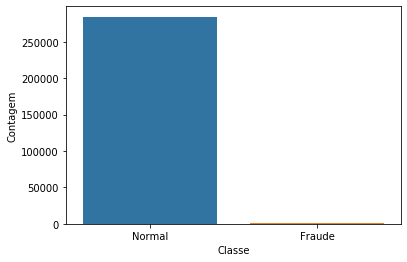

In [14]:
dados_tmp = dados.copy()
dados_tmp['Class'] = dados_tmp['Class'].apply(fraude)
sns.countplot(data=dados_tmp,x='Class')
plt.xlabel('Classe')
plt.ylabel('Contagem')
del dados_tmp

Verificando a distribuição dos valores e do tempo de cada transação para as situações normais e com fraude

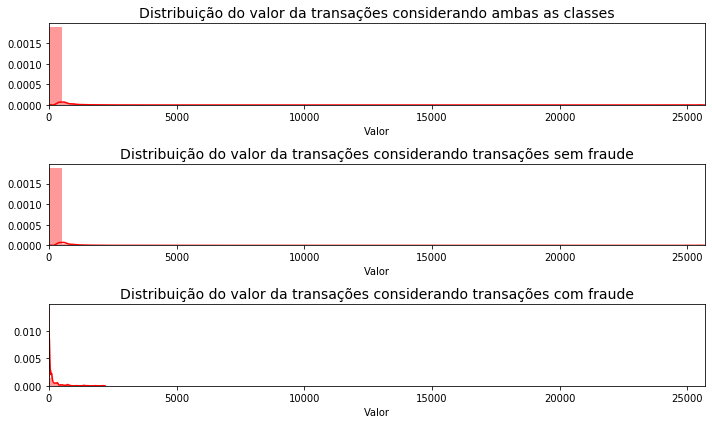

In [15]:
fig, ax = plt.subplots(3, 1, figsize=(10,6))
sns.distplot(dados['Amount'], ax=ax[0], color='r')
ax[0].set_title('Distribuição do valor da transações considerando ambas as classes', fontsize=14)
ax[0].set_xlim([min(dados['Amount']), max(dados['Amount'])])
ax[0].set_xlabel('Valor')

sns.distplot(dados[dados['Class']==0]['Amount'], ax=ax[1], color='r')
ax[1].set_title('Distribuição do valor da transações considerando transações sem fraude', fontsize=14)
ax[1].set_xlim([min(dados['Amount']), max(dados['Amount'])])
ax[1].set_xlabel('Valor')

sns.distplot(dados[dados['Class']==1]['Amount'], ax=ax[2], color='r')
ax[2].set_title('Distribuição do valor da transações considerando transações com fraude', fontsize=14)
ax[2].set_xlim([min(dados['Amount']), max(dados['Amount'])])
ax[2].set_xlabel('Valor')

plt.tight_layout()

Observamos que a grande parte das transações são de baixo valor e as com fraude tiveram valores inferiores a 4000. 

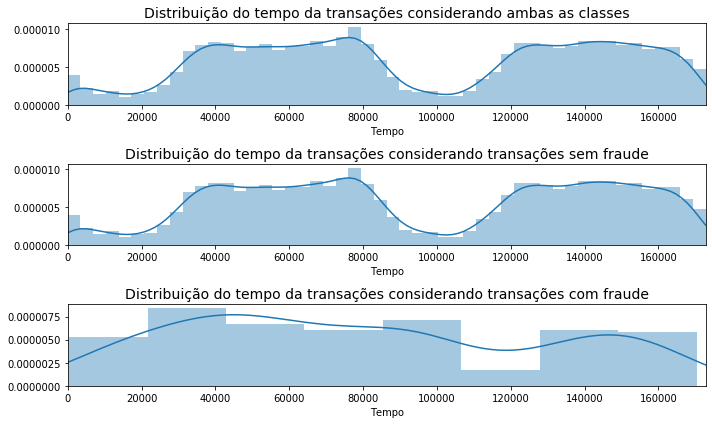

In [17]:
fig, ax = plt.subplots(3, 1, figsize=(10,6))
sns.distplot(dados['Time'], ax=ax[0])
ax[0].set_title('Distribuição do tempo da transações considerando ambas as classes', fontsize=14)
ax[0].set_xlim([min(dados['Time']), max(dados['Time'])])
ax[0].set_xlabel('Tempo')

sns.distplot(dados[dados['Class']==0]['Time'], ax=ax[1])
ax[1].set_title('Distribuição do tempo da transações considerando transações sem fraude', fontsize=14)
ax[1].set_xlim([min(dados['Time']), max(dados['Time'])])
ax[1].set_xlabel('Tempo')

sns.distplot(dados[dados['Class']==1]['Time'], ax=ax[2])
ax[2].set_title('Distribuição do tempo da transações considerando transações com fraude', fontsize=14)
ax[2].set_xlim([min(dados['Time']), max(dados['Time'])])
ax[2].set_xlabel('Tempo')

plt.tight_layout()

Observamos que as transações regulares apresentam uma distruição não simétrica com dois picos com médias aproximada de 5000 e 140000. Já as transações com fraude tem uma distribuição mais regular de tempo

As variáveis Amount e Time não estão normalizadas e apresentam uma grande variabilidade. Desta forma iremos normalizar ambas e vamos usar o RobustScaler que é menos suscetível a outliers

In [18]:
from sklearn.preprocessing import StandardScaler, RobustScaler

In [19]:
robust_scaler = RobustScaler()

In [20]:
dados['Amount'] = robust_scaler.fit_transform(dados['Amount'].values.reshape(-1,1))
dados['Time'] = robust_scaler.fit_transform(dados['Time'].values.reshape(-1,1))

In [21]:
dados.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0


Separando a amostra em variáveis de treino e teste. Neste caso usaremos a amostra toda para testar no final com o modelo utilizando apenas parte balanceada da amostra

In [22]:
from sklearn.model_selection import KFold, StratifiedKFold

In [23]:
X = dados.drop(['Class'],axis=1)
Y = dados['Class']

In [24]:
strat_kfold = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

In [25]:
for indice_treino, indice_teste in strat_kfold.split(X, Y):
    print("Treino:", indice_treino, "Teste:", indice_teste)
    X_treino, X_teste = X.iloc[indice_treino], X.iloc[indice_teste]
    Y_treino, Y_teste = Y.iloc[indice_treino], Y.iloc[indice_teste]

Treino: [ 30473  30496  31002 ... 284804 284805 284806] Teste: [    0     1     2 ... 57017 57018 57019]
Treino: [     0      1      2 ... 284804 284805 284806] Teste: [ 30473  30496  31002 ... 113964 113965 113966]
Treino: [     0      1      2 ... 284804 284805 284806] Teste: [ 81609  82400  83053 ... 170946 170947 170948]
Treino: [     0      1      2 ... 284804 284805 284806] Teste: [150654 150660 150661 ... 227866 227867 227868]
Treino: [     0      1      2 ... 227866 227867 227868] Teste: [212516 212644 213092 ... 284804 284805 284806]


In [26]:
X_treino = X_treino.values
X_teste = X_teste.values
Y_treino = Y_treino.values
Y_teste = Y_teste.values

In [27]:
label_treino_unico, label_contagem_treino = np.unique(Y_treino, return_counts=True)
label_teste_unico, label_contagem_teste = np.unique(Y_teste, return_counts=True)
print('-' * 100)

print('Distruição das classes: \n')
print(label_contagem_treino/ len(Y_treino))
print(label_contagem_teste/ len(Y_teste))

----------------------------------------------------------------------------------------------------
Distruição das classes: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


Nesta etapa iremos utilizar o processo de subamostragem aleatória, onde dados serão removidos da amostra com a finalidade de gerar um balanceamento evitando assim o chamado overfitting

Identificamos que existem 492 transações com fraude. Iremos selecionar aleatoriamente a mesma quantidade de transações sem fraude para balancear a amostra. Em seguida iremos misturar os dados para que os modelos possam capturar os padrões de cada tipo de transação

In [28]:
dados = dados.sample(frac=1)

In [29]:
tamanho_fraude = len(dados[dados['Class']==1])

In [30]:
dados_fraude = dados.loc[dados['Class'] == 1]
dados_semfraude = dados.loc[dados['Class'] == 0][:tamanho_fraude]

In [31]:
dados_novos = pd.concat([dados_fraude,dados_semfraude])
dados_novos = dados_novos.sample(frac=1, random_state=42)

Verificando dados iniciais da nova amostra

In [32]:
dados_novos.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
49505,-0.477003,-0.519455,0.714224,1.825262,2.179596,-0.353989,0.065773,0.872736,0.123405,-0.668567,...,-0.168649,-0.683123,0.218256,0.302188,-0.062579,-0.218855,-0.013266,0.037355,1.301334,0
263080,0.894031,2.132386,0.705608,-3.530759,0.514779,1.527175,-1.716268,1.132791,-0.574214,0.128904,...,0.163739,0.703910,-0.245076,0.460049,0.920281,-0.216586,-0.026219,-0.025001,-0.293440,1
58832,-0.424406,-0.861373,0.772606,1.224435,-1.673920,0.311229,0.148230,0.338499,0.359594,0.130609,...,-0.102619,-0.222311,-0.144030,-0.806968,-0.322518,0.791043,0.373845,0.207521,-0.262279,0
280149,0.994596,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,0.780968,1
184379,0.487870,-1.141559,1.927650,-3.905356,-0.073943,-0.044858,-1.756999,-1.217416,0.364563,-2.770148,...,0.102081,-0.531496,-0.328741,0.393100,0.568435,0.786605,-0.146102,0.076211,0.041920,1


Fazendo um novo gráfico de contagem para verificar o balanceamento

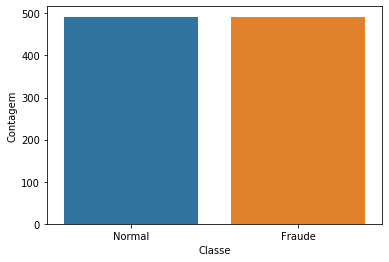

In [33]:
dados_tmp = dados_novos.copy()
dados_tmp['Class'] = dados_tmp['Class'].apply(fraude)
sns.countplot(data=dados_tmp,x='Class')
plt.xlabel('Classe')
plt.ylabel('Contagem')
del dados_tmp

Calcularemos a matriz de correlação para identificar variáveis que sejam mais sensíveis as transações com fraude. Para que isto possa ser bem identificado devemos usar a amostra balanceada gerada. Iremos mostrar a matriz de correlação sem o balanceamento para mostrar que seria muito complicado identificar as principais variáveis neste caso

In [34]:
correlacao_desbalanceada = dados.corr()
correlacao_balanceada = dados_novos.corr()

Text(0.5, 1, 'Matriz de correlação dados balanceados')

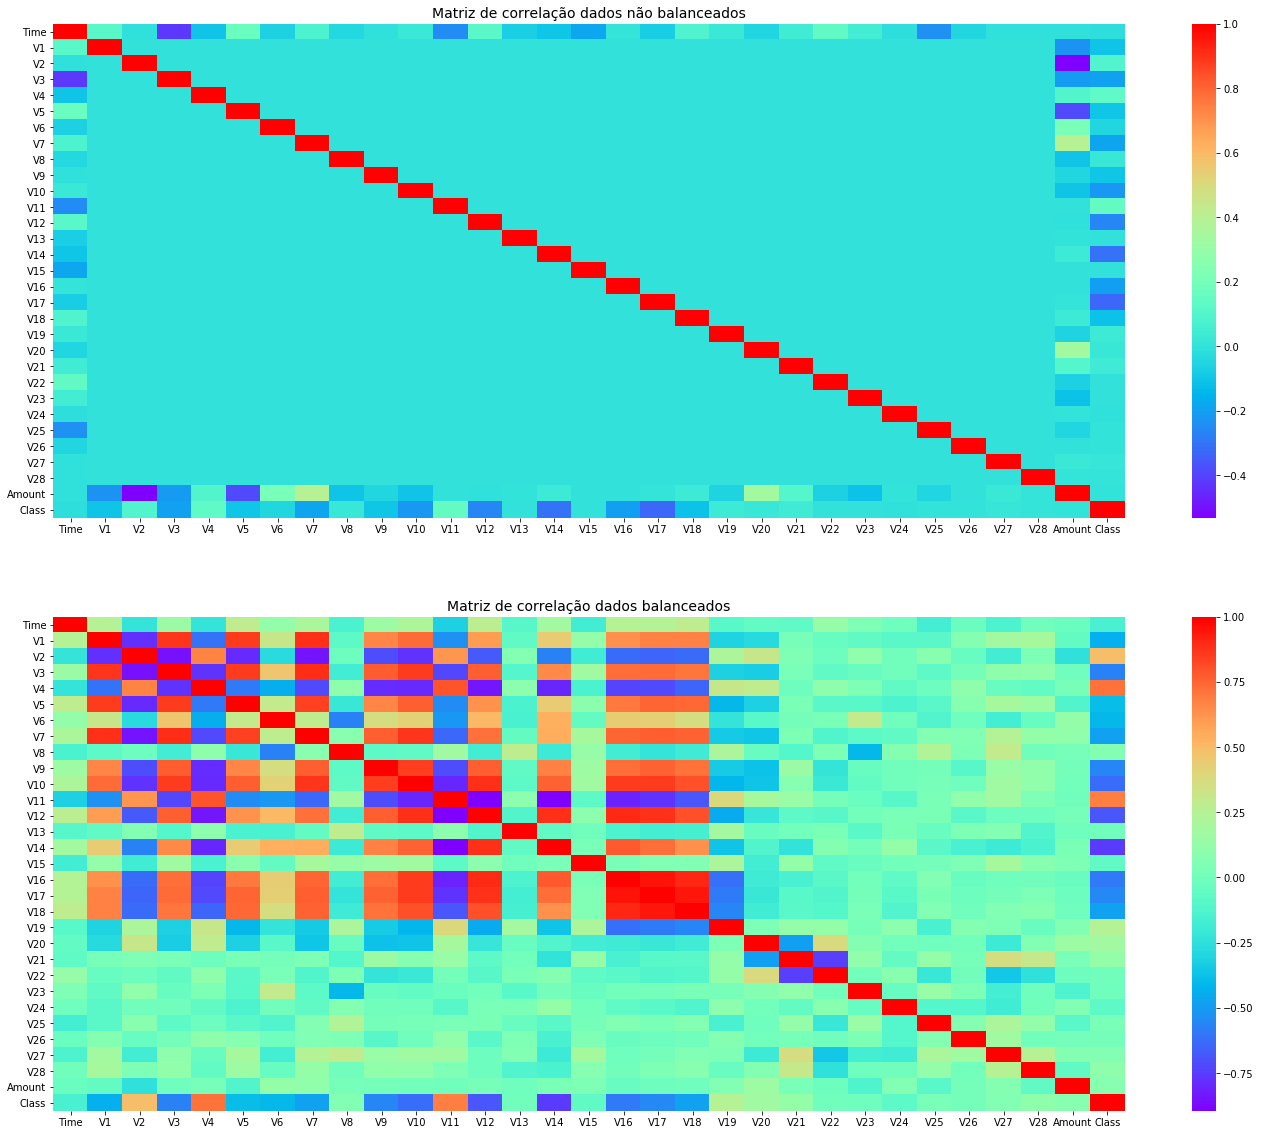

In [35]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

sns.heatmap(correlacao_desbalanceada, cmap='rainbow', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Matriz de correlação dados não balanceados", fontsize=14)

sns.heatmap(correlacao_balanceada, cmap='rainbow', annot_kws={'size':20}, ax=ax2)
ax2.set_title('Matriz de correlação dados balanceados', fontsize=14)

Podemos ver que para o caso com amostra não balanceada as variáveis parecem não possuir correlação. Já na amostra balanceada a correlação fica bem clara. 

V3, V10, V12 e V14 apresentam uma correlação negativa e quanto mais negativo o valor, mais indicará que temos uma transação com fraude

V2, V4 e V11 apresentam uma correlação positiva e quando mais alto este valor, mais ele indicará que se trata de uma fraude

Os gráficos de boxplot irão nos ajudara a entender melhor isso

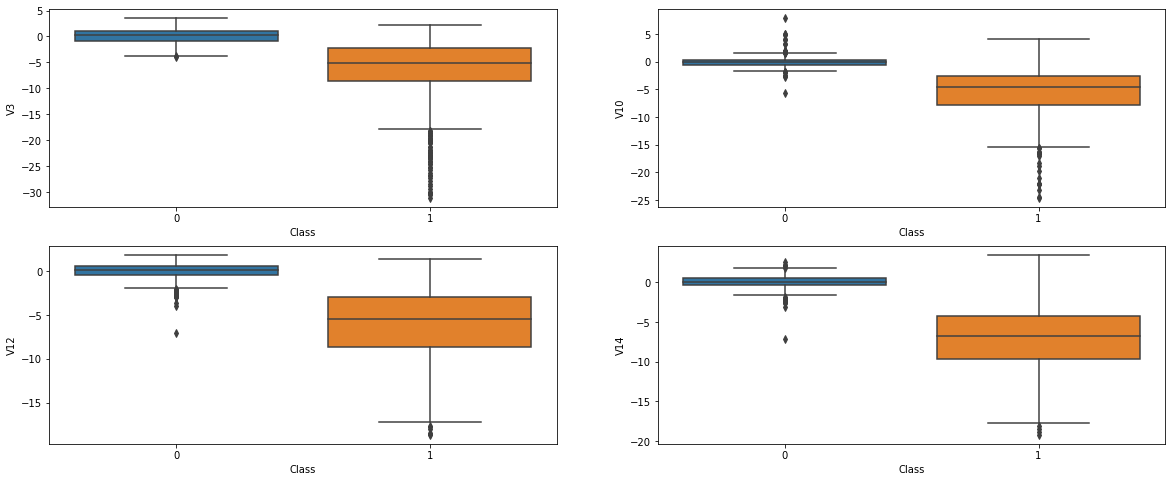

In [36]:
f, ax = plt.subplots(2,2, figsize=(20,8))

sns.boxplot(x="Class", y="V3", data=dados_novos,ax=ax[0][0])
sns.boxplot(x="Class", y="V10", data=dados_novos,ax=ax[0][1])
sns.boxplot(x="Class", y="V12", data=dados_novos,ax=ax[1][0])
sns.boxplot(x="Class", y="V14", data=dados_novos,ax=ax[1][1])

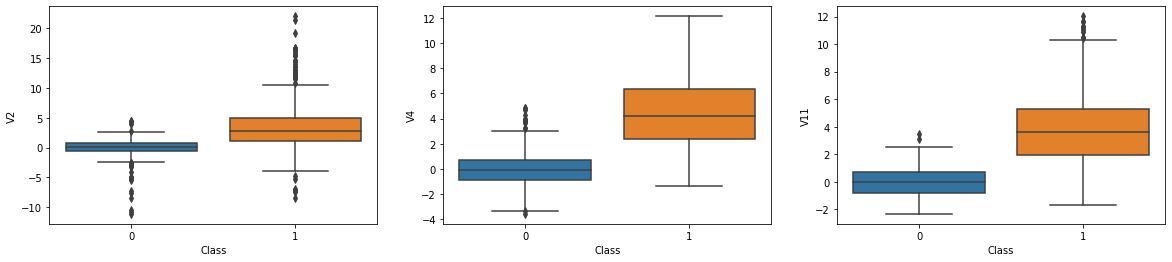

In [37]:
f, ax = plt.subplots(1,3, figsize=(20,4))

sns.boxplot(x="Class", y="V2", data=dados_novos,ax=ax[0])
sns.boxplot(x="Class", y="V4", data=dados_novos,ax=ax[1])
sns.boxplot(x="Class", y="V11", data=dados_novos,ax=ax[2])

Observamos de todos os boxplots a existência de muitos outliers que podem prejudicar os modelos de classificação. Iremos analisar cada um deles com mais cuidado e faremos o processo de remoção destes outliers

In [38]:
from scipy.stats import norm

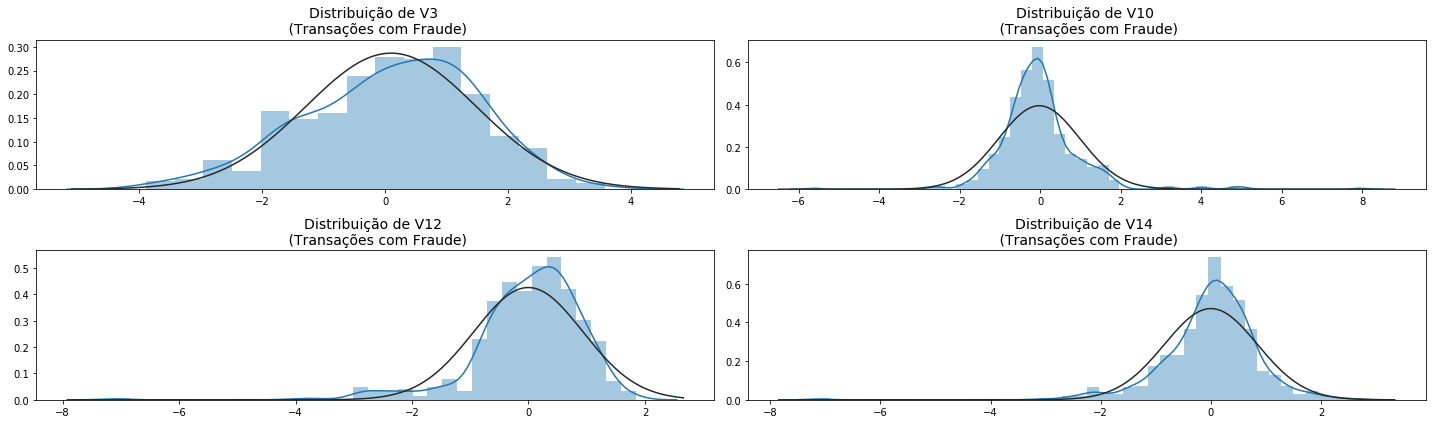

In [40]:
f, ax = plt.subplots(2,2, figsize=(20, 6))

distribuicao_v3 = dados_novos['V3'].loc[dados_novos['Class'] == 0].values
sns.distplot(distribuicao_v3,ax=ax[0][0], fit=norm)
ax[0][0].set_title('Distribuição de V3 \n (Transações com Fraude)', fontsize=14)

distribuicao_v10 = dados_novos['V10'].loc[dados_novos['Class'] == 0].values
sns.distplot(distribuicao_v10,ax=ax[0][1], fit=norm)
ax[0][1].set_title('Distribuição de V10 \n (Transações com Fraude)', fontsize=14)

distribuicao_v12 = dados_novos['V12'].loc[dados_novos['Class'] == 0].values
sns.distplot(distribuicao_v12,ax=ax[1][0], fit=norm)
ax[1][0].set_title('Distribuição de V12 \n (Transações com Fraude)', fontsize=14)

distribuicao_v14 = dados_novos['V14'].loc[dados_novos['Class'] == 0].values
sns.distplot(distribuicao_v14,ax=ax[1][1], fit=norm)
ax[1][1].set_title('Distribuição de V14 \n (Transações com Fraude)', fontsize=14)

plt.tight_layout()

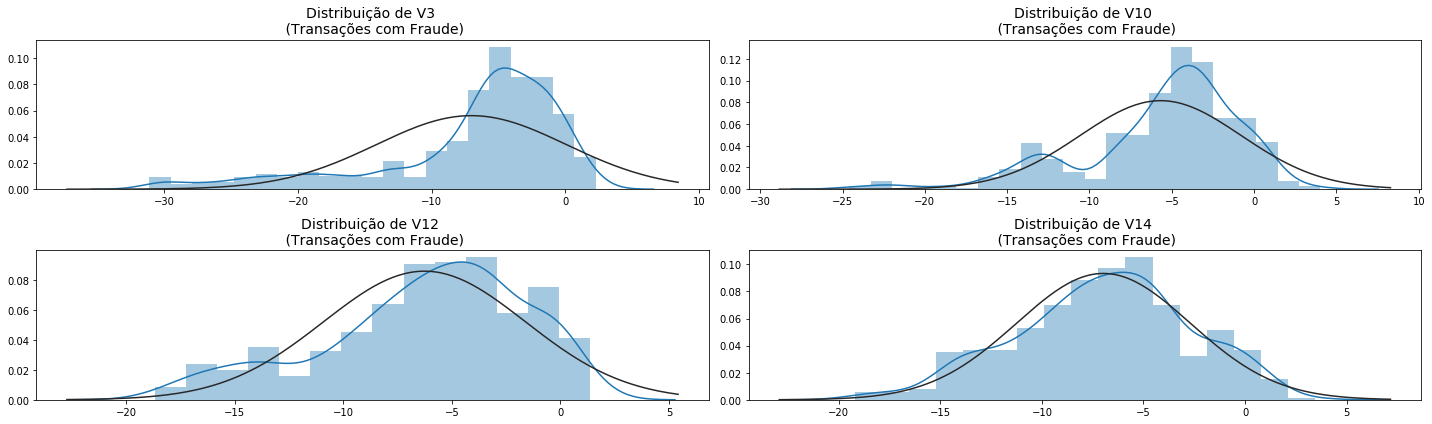

In [39]:
f, ax = plt.subplots(2,2, figsize=(20, 6))

distribuicao_v3 = dados_novos['V3'].loc[dados_novos['Class'] == 1].values
sns.distplot(distribuicao_v3,ax=ax[0][0], fit=norm)
ax[0][0].set_title('Distribuição de V3 \n (Transações com Fraude)', fontsize=14)

distribuicao_v10 = dados_novos['V10'].loc[dados_novos['Class'] == 1].values
sns.distplot(distribuicao_v10,ax=ax[0][1], fit=norm)
ax[0][1].set_title('Distribuição de V10 \n (Transações com Fraude)', fontsize=14)

distribuicao_v12 = dados_novos['V12'].loc[dados_novos['Class'] == 1].values
sns.distplot(distribuicao_v12,ax=ax[1][0], fit=norm)
ax[1][0].set_title('Distribuição de V12 \n (Transações com Fraude)', fontsize=14)

distribuicao_v14 = dados_novos['V14'].loc[dados_novos['Class'] == 1].values
sns.distplot(distribuicao_v14,ax=ax[1][1], fit=norm)
ax[1][1].set_title('Distribuição de V14 \n (Transações com Fraude)', fontsize=14)

plt.tight_layout()

Comparando as amostras com fraude e sem fraude, identificamos que no caso de fraude a variável V3 tem uma distribuição diferentes do caso sem fraude, onde neste caso os valores para fraude são mais negativos. A variável V10 fica mais centrada em torno de zero para o caso sem fraude e mais negativa para o caso com fraude. As variáveis V12 e V14 tem comportamento semelhante a V10. 

Faremos o processo de remoção de outliers nas variáveis que apresentaram maior correlação, onde espera-se que isto aumente a eficiência do modelo em identificar transações com fraude

Será calculado o intervalo interquartil (IQR) para identificar os outliers, onde o mesmo é calculado da diferença entre o terceiro e o primeiro quartil. O que estiver acima do IQR será removido

In [41]:
v3_fraude = dados_novos['V3'].loc[dados_novos['Class'] == 1].values
q25, q75 = np.percentile(v3_fraude, 25), np.percentile(v3_fraude, 75)

v3_iqr = q75 - q25

v3_cut_off = v3_iqr * 1.5
v3_inferior, v3_superior = q25 - v3_cut_off, q75 + v3_cut_off

outliers = [x for x in v3_fraude if x < v3_inferior or x > v3_superior]

dados_novos = dados_novos.drop(dados_novos[(dados_novos['V3'] > v3_superior) | (dados_novos['V3'] < v3_inferior)].index)

In [42]:
v10_fraude = dados_novos['V10'].loc[dados_novos['Class'] == 1].values
q25, q75 = np.percentile(v10_fraude, 25), np.percentile(v10_fraude, 75)

v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_inferior, v10_superior = q25 - v10_cut_off, q75 + v10_cut_off

outliers = [x for x in v10_fraude if x < v10_inferior or x > v10_superior]

dados_novos = dados_novos.drop(dados_novos[(dados_novos['V10'] > v10_superior) | (dados_novos['V10'] < v10_inferior)].index)

In [43]:
v12_fraude = dados_novos['V12'].loc[dados_novos['Class'] == 1].values
q25, q75 = np.percentile(v12_fraude, 25), np.percentile(v12_fraude, 75)

v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 1.5
v12_inferior, v12_superior = q25 - v12_cut_off, q75 + v12_cut_off

outliers = [x for x in v12_fraude if x < v12_inferior or x > v12_superior]

dados_novos = dados_novos.drop(dados_novos[(dados_novos['V12'] > v12_superior) | (dados_novos['V12'] < v12_inferior)].index)

In [44]:
v14_fraude = dados_novos['V14'].loc[dados_novos['Class'] == 1].values
q25, q75 = np.percentile(v14_fraude, 25), np.percentile(v14_fraude, 75)

v14_iqr = q75 - q25

v14_cut_off = v14_iqr * 1.5
v14_inferior, v14_superior = q25 - v14_cut_off, q75 + v14_cut_off

outliers = [x for x in v14_fraude if x < v14_inferior or x > v14_superior]

dados_novos = dados_novos.drop(dados_novos[(dados_novos['V14'] > v14_superior) | (dados_novos['V14'] < v14_inferior)].index)

Criando um novo boxplot para verificar se os outliers foram devidamente removidos

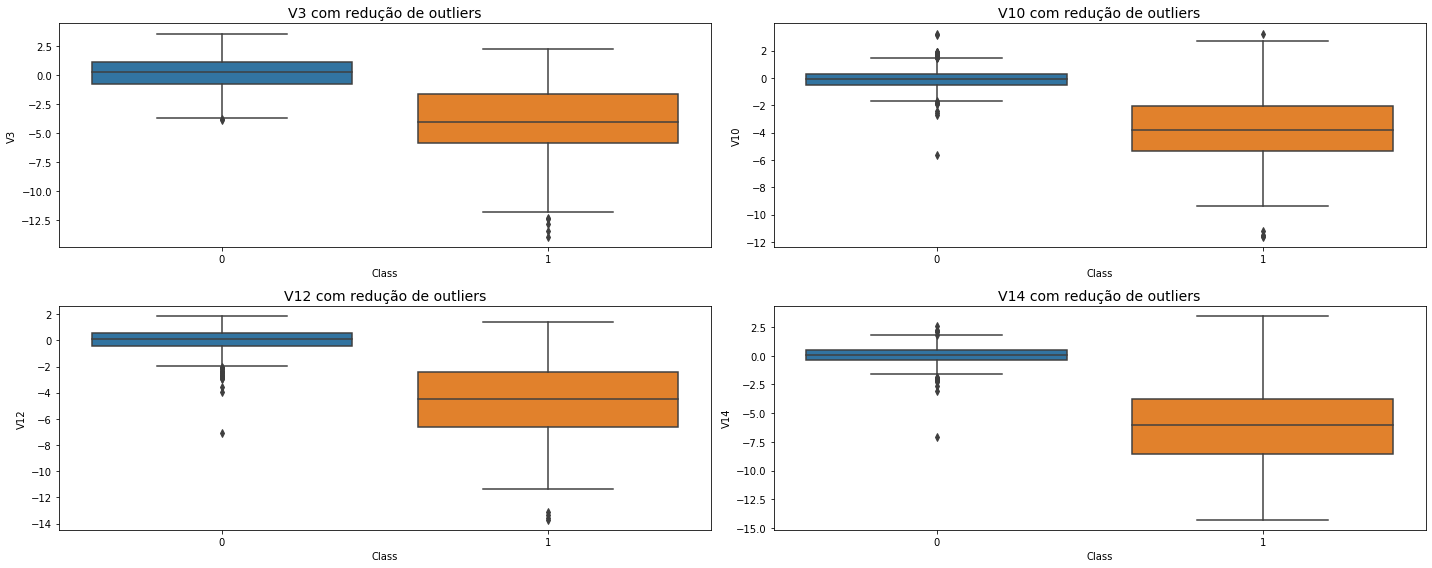

In [45]:
f, ax = plt.subplots(2,2, figsize=(20,8))

sns.boxplot(x="Class", y="V3", data=dados_novos,ax=ax[0][0])
ax[0][0].set_title("V3 com redução de outliers", fontsize=14)
sns.boxplot(x="Class", y="V10", data=dados_novos,ax=ax[0][1])
ax[0][1].set_title("V10 com redução de outliers", fontsize=14)
sns.boxplot(x="Class", y="V12", data=dados_novos,ax=ax[1][0])
ax[1][0].set_title("V12 com redução de outliers", fontsize=14)
sns.boxplot(x="Class", y="V14", data=dados_novos,ax=ax[1][1])
ax[1][1].set_title("V14 com redução de outliers", fontsize=14)
plt.tight_layout()

Observamos que ainda existem outliers porém numa quantidade bem menor e com valores de máximo e mínimo mais condizentes

Utilizaremos três modelos de aglomeração para tentar isolar as transações com fraude e sem fraude baseados em seus padrões. Os modelos usados serão TSNE que funciona bem mesmo nos casos de amsotra pequena e também usaremos PCA e TruncatedSVD

In [46]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches

In [47]:
X = dados_novos.drop('Class', axis=1).values
Y = dados_novos['Class'].values

In [48]:
X_reduzido_tsne = TSNE(n_components=2, random_state=42).fit_transform(X)

In [49]:
X_reduzido_pca = PCA(n_components=2, random_state=42).fit_transform(X)

In [50]:
X_reduzido_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X)

In [51]:
azul = mpatches.Patch(color='#0A0AFF', label='Sem fraude')
vermelho = mpatches.Patch(color='#AF0000', label='Fraude')

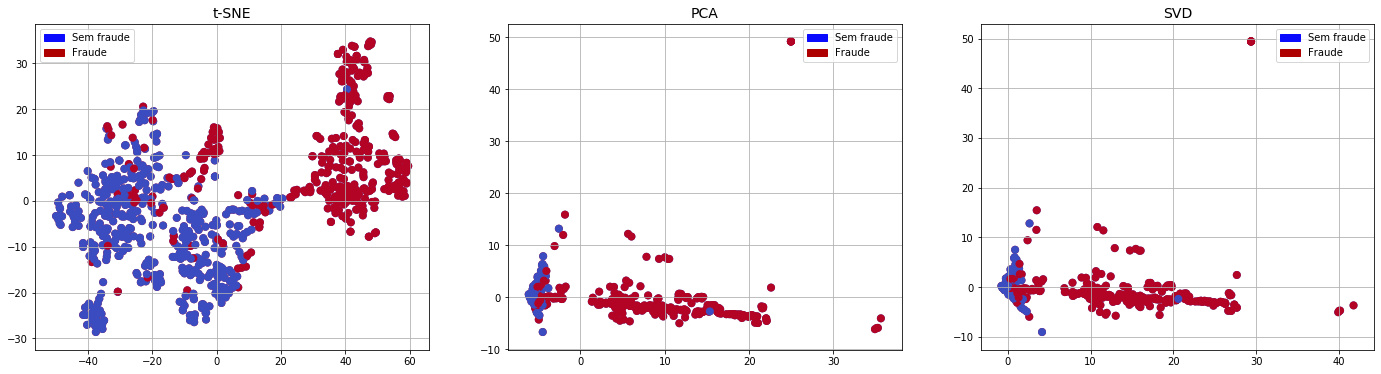

In [52]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
ax1.scatter(X_reduzido_tsne[:,0], X_reduzido_tsne[:,1], c=(Y == 0), cmap='coolwarm', label='Sem fraude', linewidths=2)
ax1.scatter(X_reduzido_tsne[:,0], X_reduzido_tsne[:,1], c=(Y == 1), cmap='coolwarm', label='Fraude', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)
ax1.grid(True)
ax1.legend(handles=[azul, vermelho])

ax2.scatter(X_reduzido_pca[:,0], X_reduzido_pca[:,1], c=(Y == 0), cmap='coolwarm', label='Sem fraude', linewidths=2)
ax2.scatter(X_reduzido_pca[:,0], X_reduzido_pca[:,1], c=(Y == 1), cmap='coolwarm', label='Fraude', linewidths=2)
ax2.set_title('PCA', fontsize=14)
ax2.grid(True)
ax2.legend(handles=[azul, vermelho])

ax3.scatter(X_reduzido_svd[:,0], X_reduzido_svd[:,1], c=(Y == 0), cmap='coolwarm', label='Sem fraude', linewidths=2)
ax3.scatter(X_reduzido_svd[:,0], X_reduzido_svd[:,1], c=(Y == 1), cmap='coolwarm', label='Fraude', linewidths=2)
ax3.set_title('SVD', fontsize=14)
ax3.grid(True)
ax3.legend(handles=[azul, vermelho])

Observa-se das aglomerações que existe alguma separação entre os tipos das transações

Criarems agora a amostra de treino e teste

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=0.2, random_state=42)

Testaremos os modelos de machine learning regressão logística, Support Vector Classifier, Arvore de decisão e floresta aleatória

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [56]:
modelos = {
    "Regressao Logistica": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "SVC": SVC(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "RDC" : RandomForestClassifier()
}

Utilizaremos validação cruzada para treinarmos o modelo com amostras diferentes e aumentar a acurácia

In [57]:
from sklearn.model_selection import cross_val_score

In [58]:
for nome, modelo in modelos.items():
    modelo.fit(X_treino, Y_treino)
    score_treino = cross_val_score(modelo, X_treino, Y_treino, cv=5)
    print("Modelo: ", modelo.__class__.__name__, "possui acuracia", round(score_treino.mean(), 2) * 100, "%")

Modelo:  LogisticRegression possui acuracia 93.0 %
Modelo:  KNeighborsClassifier possui acuracia 93.0 %
Modelo:  SVC possui acuracia 93.0 %
Modelo:  DecisionTreeClassifier possui acuracia 89.0 %
Modelo:  RandomForestClassifier possui acuracia 93.0 %


Observamos que regressão logística, KNN, SVC e RFC tiveram acurácias iguais. Iremos refinar cada um destas modelos com o objetivo de melhorar as acurácias. Isto será feito com o GridSearchCV que varrerá todos os parâmetros de entrada de cada modelo encontrando a melhor combinação

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_treino, Y_treino)
log_reg = grid_log_reg.best_estimator_
log_reg_score = cross_val_score(log_reg, X_treino, Y_treino, cv=5)
print('Score Regressao Logistica Validacao Cruzada: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')

Score Regressao Logistica Validacao Cruzada:  93.99%


In [62]:
knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_treino, Y_treino)
knears_neighbors = grid_knears.best_estimator_
knears_score = cross_val_score(knears_neighbors, X_treino, Y_treino, cv=5)
print('Score KNN Validacao Cruzada: ', round(knears_score.mean() * 100, 2).astype(str) + '%')

Score KNN Validacao Cruzada:  92.71%


In [63]:
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_treino, Y_treino)
svc = grid_svc.best_estimator_
svc_score = cross_val_score(svc, X_treino, Y_treino, cv=5)
print('Score SVC Validacao Cruzada: ', round(svc_score.mean() * 100, 2).astype(str) + '%')

Score SVC Validacao Cruzada:  92.85%


In [70]:
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,10,1)), 
              "min_samples_leaf": list(range(3,10,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params,n_jobs=-1)
grid_tree.fit(X_treino, Y_treino)
tree_clf = grid_tree.best_estimator_
tree_score = cross_val_score(tree_clf, X_treino, Y_treino, cv=5)
print('Score DTC Validacao Cruzada: ', round(tree_score.mean() * 100, 2).astype(str) + '%')

Score DTC Validacao Cruzada:  92.71%


In [71]:
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,10,1)), 
              "min_samples_leaf": list(range(5,10,1))}
grid_tree = GridSearchCV(RandomForestClassifier(), tree_params,n_jobs=-1)
grid_tree.fit(X_treino, Y_treino)
tree_clf = grid_tree.best_estimator_
rfc_score = cross_val_score(tree_clf, X_treino, Y_treino, cv=5)
print('Score RFC Validacao Cruzada: ', round(rfc_score.mean() * 100, 2).astype(str) + '%')

Score RFC Validacao Cruzada:  93.57%


Observamos uma melhora na regressão logística indicando ser o melhor modelo para este problema, seguido pela floresta aleatória

Criando subamostras para validação

In [72]:
X_subamostra = dados.drop('Class', axis=1)
Y_subamostra = dados['Class']

In [73]:
for indice_treino, indice_teste in strat_kfold.split(X_subamostra, Y_subamostra):
    print("Treino:", indice_treino, "Teste:", indice_teste)
    X_treino_subamostra, X_teste_subamostra = X_subamostra.iloc[indice_treino], X_subamostra.iloc[indice_teste]
    Y_treino_subamostra, Y_teste_subamostra = Y_subamostra.iloc[indice_treino], Y_subamostra.iloc[indice_teste]

Treino: [ 52019  52562  52728 ... 284804 284805 284806] Teste: [    0     1     2 ... 56963 56964 56965]
Treino: [     0      1      2 ... 284804 284805 284806] Teste: [ 52019  52562  52728 ... 113925 113926 113927]
Treino: [     0      1      2 ... 284804 284805 284806] Teste: [112646 112654 113254 ... 170887 170888 170889]
Treino: [     0      1      2 ... 284804 284805 284806] Teste: [167149 167679 168285 ... 227852 227853 227854]
Treino: [     0      1      2 ... 227852 227853 227854] Teste: [223199 224141 226397 ... 284804 284805 284806]


In [74]:
X_treino_subamostra = X_treino_subamostra.values
X_teste_subamostra = X_teste_subamostra.values
Y_treino_subamostra = Y_treino_subamostra.values
Y_teste_subamostra = Y_teste_subamostra.values

Balanceando amostras para ficarem com a mesma quantidade cada classe. Usaremos NearMiss para selecionar a quantidade de transações sem fraude na mesma quantidade das com fraude

In [75]:
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.metrics import classification_report_imbalanced

Using TensorFlow backend.


In [76]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

In [77]:
X_nearmiss, Y_nearmiss = NearMiss().fit_sample(X_subamostra.values, Y_subamostra.values)

In [78]:
from collections import Counter

In [79]:
contagem_nearmiss = Counter(Y_nearmiss)

In [80]:
print('Contagem NearMiss: {}'.format(contagem_nearmiss))

Contagem NearMiss: Counter({0: 492, 1: 492})


Calcularemos as métricas dos problemas de classificação para determinar o melhor modelo

In [81]:
acuracia_subamostra = []
precisao_subamostra = []
recall_subamostra = []
f1_subamostra = []
auc_subamostra = []


for indice_treino, indice_teste in strat_kfold.split(X_treino_subamostra, Y_treino_subamostra):
    pipeline_subamostra = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), log_reg)
    
    modelo_subamostra = pipeline_subamostra.fit(X_treino_subamostra[indice_treino], Y_treino_subamostra[indice_treino])
    
    previsao_subamostra = modelo_subamostra.predict(X_treino_subamostra[indice_teste])
    
    acuracia_subamostra.append(pipeline_subamostra.score(X_treino_subamostra[indice_teste], Y_treino_subamostra[indice_teste]))
    
    precisao_subamostra.append(precision_score(Y_treino_subamostra[indice_teste],previsao_subamostra))
    
    recall_subamostra.append(recall_score(Y_treino_subamostra[indice_teste],previsao_subamostra))
    
    f1_subamostra.append(f1_score(Y_treino_subamostra[indice_teste],previsao_subamostra))
    
    auc_subamostra.append(roc_auc_score(Y_treino_subamostra[indice_teste],previsao_subamostra))

In [82]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

Analisando curva de aprendizado para determinar melhor modelo

In [83]:
def plot_learning_curve(estimator1, estimator2, estimator3, estimator4, X, Y, ylim=None, cv=None,
                        tamanho_treino=np.linspace(.1, 1.0, 5)):
    
    f, ax = plt.subplots(2,2, figsize=(20,14), sharey=True)
    
    if ylim is not None:
        plt.ylim(*ylim)
        
    tamanho_treino, score_treino, score_teste = learning_curve(estimator1, X, Y, cv=cv, train_sizes=tamanho_treino,n_jobs=2)
    media_score_treino = np.mean(score_treino, axis=1)
    std_score_treino = np.std(score_treino, axis=1)
    media_score_teste = np.mean(score_teste, axis=1)
    std_score_teste = np.std(score_teste, axis=1)
    
    ax[0][0].fill_between(tamanho_treino, media_score_treino - std_score_treino,
                     media_score_treino + std_score_treino, alpha=0.1,
                     color="#ff9124")
    
    ax[0][0].fill_between(tamanho_treino, media_score_teste - std_score_teste,
                     media_score_teste + std_score_teste, alpha=0.1, color="#2492ff")
    
    ax[0][0].plot(tamanho_treino, media_score_treino, 'o-', color="#ff9124", label="Score treino")
    ax[0][0].plot(tamanho_treino, media_score_teste, 'o-', color="#2492ff", label="Score Validação Cruzada")
    ax[0][0].set_title("Curva Regressão logistica", fontsize=14)
    ax[0][0].set_xlabel('Tamanho treino (m)')
    ax[0][0].set_ylabel('Score')
    ax[0][0].grid(True)
    ax[0][0].legend(loc="best")
    
    
    tamanho_treino, score_treino, score_teste = learning_curve(estimator2, X, Y, cv=cv, train_sizes=tamanho_treino,n_jobs=2)
    media_score_treino = np.mean(score_treino, axis=1)
    std_score_treino = np.std(score_treino, axis=1)
    media_score_teste = np.mean(score_teste, axis=1)
    std_score_teste = np.std(score_teste, axis=1)
    
    ax[0][1].fill_between(tamanho_treino, media_score_treino - std_score_treino,
                     media_score_treino + std_score_treino, alpha=0.1,
                     color="#ff9124")
    
    ax[0][1].fill_between(tamanho_treino, media_score_teste - std_score_teste,
                     media_score_teste + std_score_teste, alpha=0.1, color="#2492ff")
    
    ax[0][1].plot(tamanho_treino, media_score_treino, 'o-', color="#ff9124", label="Score treino")
    ax[0][1].plot(tamanho_treino, media_score_teste, 'o-', color="#2492ff", label="Score Validação Cruzada")
    ax[0][1].set_title("Curva KNN", fontsize=14)
    ax[0][1].set_xlabel('Tamanho treino (m)')
    ax[0][1].set_ylabel('Score')
    ax[0][1].grid(True)
    ax[0][1].legend(loc="best")
    
    
    tamanho_treino, score_treino, score_teste = learning_curve(estimator3, X, Y, cv=cv, train_sizes=tamanho_treino,n_jobs=2)
    media_score_treino = np.mean(score_treino, axis=1)
    std_score_treino = np.std(score_treino, axis=1)
    media_score_teste = np.mean(score_teste, axis=1)
    std_score_teste = np.std(score_teste, axis=1)
    
    ax[1][0].fill_between(tamanho_treino, media_score_treino - std_score_treino,
                     media_score_treino + std_score_treino, alpha=0.1,
                     color="#ff9124")
    
    ax[1][0].fill_between(tamanho_treino, media_score_teste - std_score_teste,
                     media_score_teste + std_score_teste, alpha=0.1, color="#2492ff")
    
    ax[1][0].plot(tamanho_treino, media_score_treino, 'o-', color="#ff9124", label="Score treino")
    ax[1][0].plot(tamanho_treino, media_score_teste, 'o-', color="#2492ff", label="Score Validação Cruzada")
    ax[1][0].set_title("Curva SVC", fontsize=14)
    ax[1][0].set_xlabel('Tamanho treino (m)')
    ax[1][0].set_ylabel('Score')
    ax[1][0].grid(True)
    ax[1][0].legend(loc="best")
    
    
    tamanho_treino, score_treino, score_teste = learning_curve(estimator4, X, Y, cv=cv, train_sizes=tamanho_treino,n_jobs=2)
    media_score_treino = np.mean(score_treino, axis=1)
    std_score_treino = np.std(score_treino, axis=1)
    media_score_teste = np.mean(score_teste, axis=1)
    std_score_teste = np.std(score_teste, axis=1)
    
    ax[1][1].fill_between(tamanho_treino, media_score_treino - std_score_treino,
                     media_score_treino + std_score_treino, alpha=0.1,
                     color="#ff9124")
    
    ax[1][1].fill_between(tamanho_treino, media_score_teste - std_score_teste,
                     media_score_teste + std_score_teste, alpha=0.1, color="#2492ff")
    
    ax[1][1].plot(tamanho_treino, media_score_treino, 'o-', color="#ff9124", label="Score treino")
    ax[1][1].plot(tamanho_treino, media_score_teste, 'o-', color="#2492ff", label="Score Validação Cruzada")
    ax[1][1].set_title("Curva DTC", fontsize=14)
    ax[1][1].set_xlabel('Tamanho treino (m)')
    ax[1][1].set_ylabel('Score')
    ax[1][1].grid(True)
    ax[1][1].legend(loc="best")
    
    return plt

<module 'matplotlib.pyplot' from '/Users/danilo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

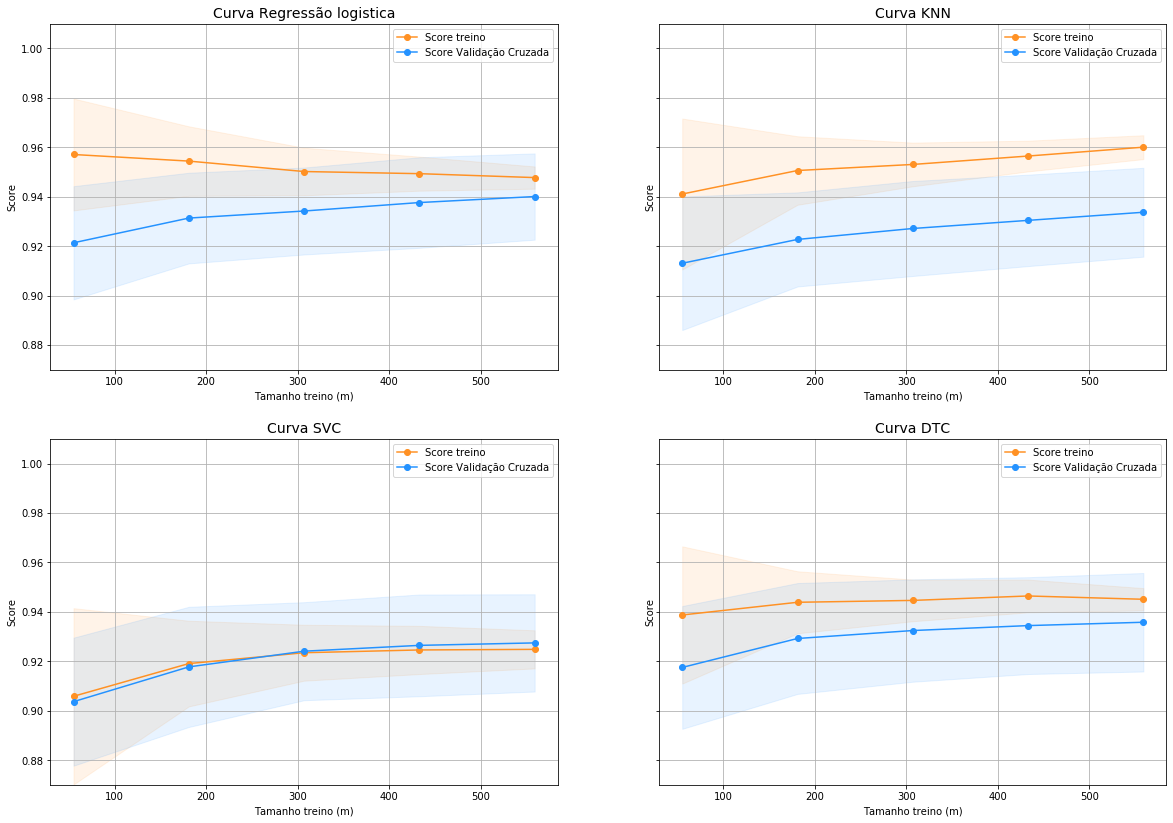

In [84]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(log_reg, knears_neighbors, svc, tree_clf, X_treino, Y_treino, (0.87, 1.01), cv=cv)

Das curvas de aprendizado observamos que regressão logística e SVC são os melhores modelos

In [85]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

In [86]:
previsao_reg_log = cross_val_predict(log_reg, X_treino, Y_treino, cv=5,method="decision_function")
previsao_knn = cross_val_predict(knears_neighbors, X_treino, Y_treino, cv=5)
previsao_svc = cross_val_predict(svc, X_treino, Y_treino, cv=5,method="decision_function")
previsao_dtc = cross_val_predict(tree_clf, X_treino, Y_treino, cv=5)

In [87]:
from sklearn.metrics import roc_auc_score

Calculando o score pela curva ROC

In [88]:
print('Logistic Regression: ', roc_auc_score(Y_treino, previsao_reg_log))
print('KNears Neighbors: ', roc_auc_score(Y_treino, previsao_knn))
print('Support Vector Classifier: ', roc_auc_score(Y_treino, previsao_svc))
print('Decision Tree Classifier: ', roc_auc_score(Y_treino, previsao_dtc))

Logistic Regression:  0.9735874178247483
KNears Neighbors:  0.921577764833153
Support Vector Classifier:  0.9726803694765749
Decision Tree Classifier:  0.9313597403678123


Verificamos novamente que regressão logística é o melhor modelo seguido de perto pelo modelo SVC

In [89]:
log_fpr, log_tpr, log_thresold = roc_curve(Y_treino, previsao_reg_log)
knear_fpr, knear_tpr, knear_threshold = roc_curve(Y_treino, previsao_knn)
svc_fpr, svc_tpr, svc_threshold = roc_curve(Y_treino, previsao_svc)
tree_fpr, tree_tpr, tree_threshold = roc_curve(Y_treino, previsao_dtc)

In [90]:
def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('Curva ROC \n Top 4 Classificadores', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Score Regressão Logistica: {:.4f}'.format(roc_auc_score(Y_treino, previsao_reg_log)))
    plt.plot(knear_fpr, knear_tpr, label='Score KNN: {:.4f}'.format(roc_auc_score(Y_treino, previsao_knn)))
    plt.plot(svc_fpr, svc_tpr, label='Score SVC: {:.4f}'.format(roc_auc_score(Y_treino, previsao_svc)))
    plt.plot(tree_fpr, tree_tpr, label='Score DTE: {:.4f}'.format(roc_auc_score(Y_treino, previsao_dtc)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('Taxa de Falso Positivo', fontsize=16)
    plt.ylabel('Taxa Verdadeiro Positivo', fontsize=16)
    plt.legend()

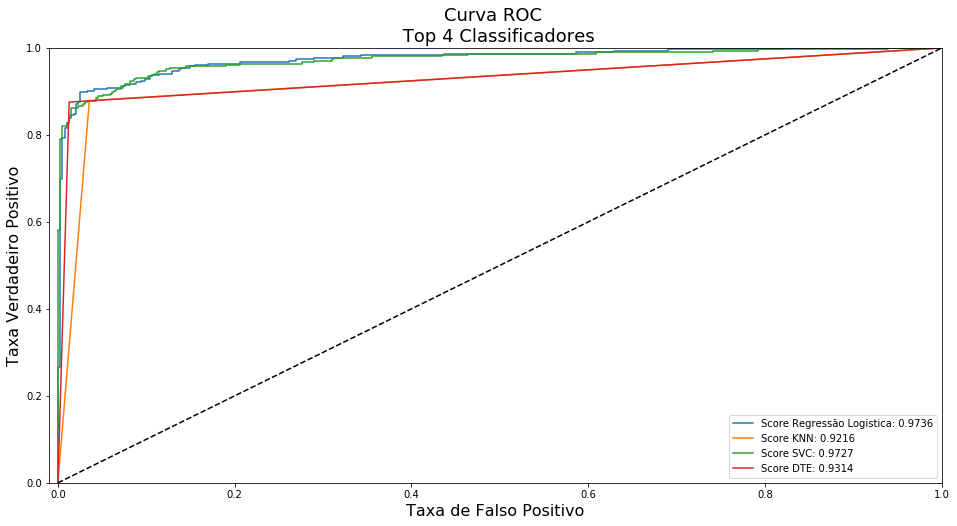

In [91]:
graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)

Observamos pela curva que novamente regressão logística é o melhor modelo, com acurácia quase máxima

In [92]:
from sklearn.metrics import precision_recall_curve

In [93]:
precision_log, recall_log, threshold_log = precision_recall_curve(Y_treino, previsao_reg_log)
precision_svc, recall_svc, threshold_svc = precision_recall_curve(Y_treino, previsao_svc)

In [94]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
Y_pred_log = log_reg.predict(X_treino)
Y_pred_svc = svc.predict(X_treino)

In [95]:
print('Regressão Logistica:')
print('Overfitting: \n')
print('Recall Score: {:.2f}'.format(recall_score(Y_treino, Y_pred_log)))
print('Precision Score: {:.2f}'.format(precision_score(Y_treino, Y_pred_log)))
print('F1 Score: {:.2f}'.format(f1_score(Y_treino, Y_pred_log)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(Y_treino, Y_pred_log)))

Regressão Logistica:
Overfitting: 

Recall Score: 0.91
Precision Score: 0.67
F1 Score: 0.77
Accuracy Score: 0.77


In [96]:
print('SVC')
print('Recall Score: {:.2f}'.format(recall_score(Y_treino, Y_pred_svc)))
print('Precision Score: {:.2f}'.format(precision_score(Y_treino, Y_pred_svc)))
print('F1 Score: {:.2f}'.format(f1_score(Y_treino, Y_pred_svc)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(Y_treino, Y_pred_svc)))

SVC
Recall Score: 0.87
Precision Score: 0.95
F1 Score: 0.91
Accuracy Score: 0.92


Pelo recall vemos que regressão logistica é melhor, porém, pelas outras métricas SVC se mostrou melhor

Utilizaremos agora a técnica SMOTE que cria pontos sintéticos com a finalidade de balancear a amostra. SMOTE usa a distância entre os vizinhos mais próximos da classe minoritária e entre estas distâncias cria pontos sintéticos. Costuma ter uma acurácia melhor comparada a subamostra porém levando mais tempo para treinar o modelo

In [97]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [98]:
lista_acuracia = []
lista_precisao = []
lista_recall = []
lista_f1 = []
lista_auc = []

log_reg_sm = LogisticRegression()
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
rand_log_reg = RandomizedSearchCV(log_reg_sm, log_reg_params, n_iter=4)


for treino, teste in strat_kfold.split(X_treino, Y_treino):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg)
    modelo = pipeline.fit(X_treino[treino], Y_treino[treino])
    best_est = rand_log_reg.best_estimator_
    previsao = best_est.predict(X_treino[teste])
    
    lista_acuracia.append(pipeline.score(X_treino[teste], Y_treino[teste]))
    lista_precisao.append(precision_score(Y_treino[teste], previsao))
    lista_recall.append(recall_score(Y_treino[teste], previsao))
    lista_f1.append(f1_score(Y_treino[teste], previsao))
    lista_auc.append(roc_auc_score(Y_treino[teste], previsao))

In [99]:
print("Acuracia: {}".format(np.mean(lista_acuracia)))
print("Precisao: {}".format(np.mean(lista_precisao)))
print("Recall: {}".format(np.mean(lista_recall)))
print("F1: {}".format(np.mean(lista_f1)))

Acuracia: 0.9299075025693732
Precisao: 0.9356075031722172
Recall: 0.9016393442622951
F1: 0.9179514259324731


Estes novos resultados mostram claramente que o modelo de regressão logística ficou bem melhor

In [104]:
lista_acuracia = []
lista_precisao = []
lista_recall = []
lista_f1 = []
lista_auc = []

svc_sm = SVC()
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
rand_svc = RandomizedSearchCV(svc_sm, svc_params, n_iter=4)


for treino, teste in strat_kfold.split(X_treino, Y_treino):
    pipeline_svc = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_svc)
    modelo_svc = pipeline_svc.fit(X_treino[treino], Y_treino[treino])
    best_est_svc = rand_svc.best_estimator_
    previsao_svc = best_est_svc.predict(X_treino[teste])
    
    lista_acuracia.append(pipeline_svc.score(X_treino[teste], Y_treino[teste]))
    lista_precisao.append(precision_score(Y_treino[teste], previsao_svc))
    lista_recall.append(recall_score(Y_treino[teste], previsao_svc))
    lista_f1.append(f1_score(Y_treino[teste], previsao_svc))
    lista_auc.append(roc_auc_score(Y_treino[teste], previsao_svc))

In [105]:
print("Acuracia: {}".format(np.mean(lista_acuracia)))
print("Precisao: {}".format(np.mean(lista_precisao)))
print("Recall: {}".format(np.mean(lista_recall)))
print("F1: {}".format(np.mean(lista_f1)))

Acuracia: 0.9198869475847893
Precisao: 0.9240766866706587
Recall: 0.8918032786885245
F1: 0.9067685818129083


Observamos que o modelo SVC também melhorou e ficou com acurácia abaixo da regressão logística

In [106]:
labels = ['Sem Fraude', 'Com Fraude']
previsao_smote = best_est.predict(X_teste)
print(classification_report(Y_teste, previsao_smote, target_names=labels))

              precision    recall  f1-score   support

  Sem Fraude       0.89      0.97      0.93        92
  Com Fraude       0.96      0.87      0.91        83

    accuracy                           0.92       175
   macro avg       0.93      0.92      0.92       175
weighted avg       0.92      0.92      0.92       175



In [107]:
from sklearn.metrics import average_precision_score

In [108]:
Y_score = best_est.decision_function(X_teste)
precisao_media = average_precision_score(Y_teste, Y_score)

In [109]:
print('Score Medio precision-recall: {0:0.2f}'.format(precisao_media))

Score Medio precision-recall: 0.98


Text(0.5, 1.0, 'Curva Precisao-Recall Superamostra: \n Score Medio Precision-Recall Score =0.98')

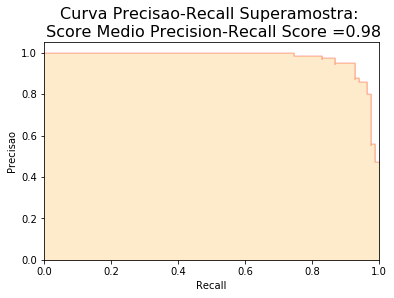

In [110]:
precision, recall, _ = precision_recall_curve(Y_teste, Y_score)

plt.step(recall, precision, color='r', alpha=0.2,where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,color='#F59B00')

plt.xlabel('Recall')
plt.ylabel('Precisao')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Curva Precisao-Recall Superamostra: \n Score Medio Precision-Recall Score ={0:0.2f}'.format(precisao_media), fontsize=16)

In [111]:
sm = SMOTE(sampling_strategy='minority', random_state=42)

In [112]:
Xsmote_treino, Ysmote_treino = sm.fit_sample(X_treino, Y_treino)

In [113]:
log_reg_sm = grid_log_reg.best_estimator_

In [114]:
log_reg_sm.fit(Xsmote_treino, Ysmote_treino)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [115]:
from sklearn.metrics import confusion_matrix

In [116]:
Y_pred_log_reg = log_reg_sm.predict(X_teste)
Y_pred_knear = knears_neighbors.predict(X_teste)
Y_pred_svc = svc.predict(X_teste)
Y_pred_tree = tree_clf.predict(X_teste)

In [117]:
cm_log_reg = confusion_matrix(Y_teste, Y_pred_log_reg)
cm_kneighbors = confusion_matrix(Y_teste, Y_pred_knear)
cm_svc = confusion_matrix(Y_teste, Y_pred_svc)
cm_tree = confusion_matrix(Y_teste, Y_pred_tree)

[Text(0, 0.5, ''), Text(0, 1.5, '')]

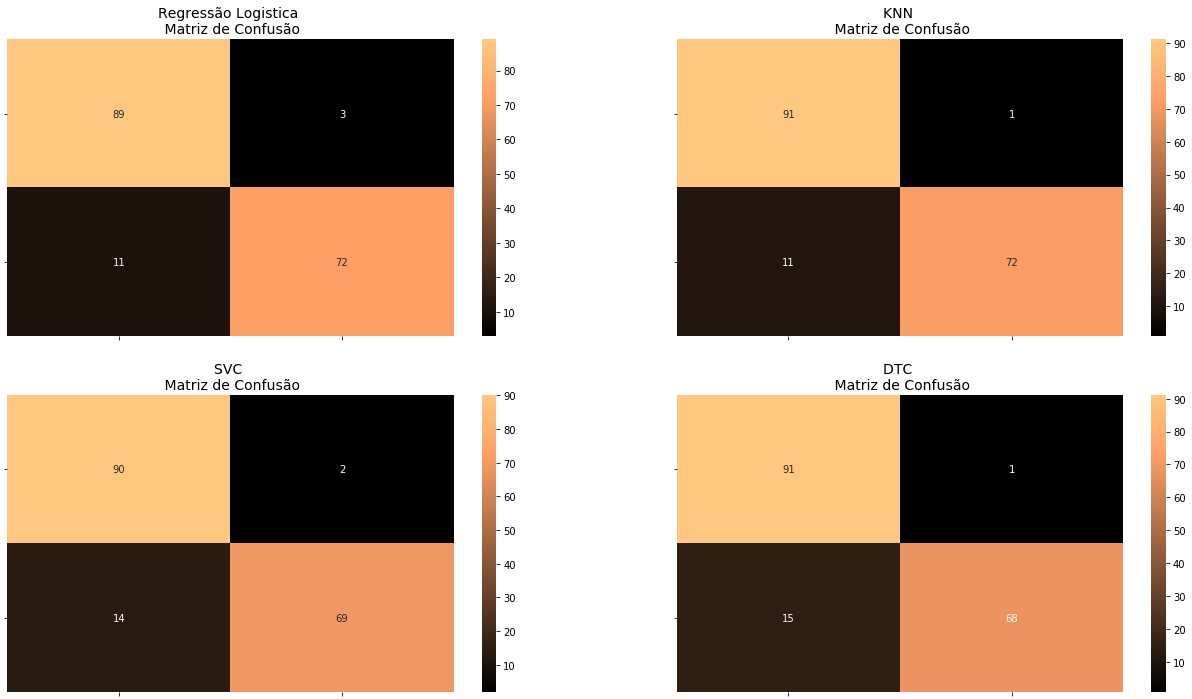

In [118]:
fig, ax = plt.subplots(2, 2,figsize=(22,12))


sns.heatmap(cm_log_reg, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0, 0].set_title("Regressão Logistica \n Matriz de Confusão", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(cm_kneighbors, ax=ax[0][1], annot=True, cmap=plt.cm.copper)
ax[0][1].set_title("KNN \n Matriz de Confusão", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(cm_svc, ax=ax[1][0], annot=True, cmap=plt.cm.copper)
ax[1][0].set_title("SVC \n Matriz de Confusão", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(cm_tree, ax=ax[1][1], annot=True, cmap=plt.cm.copper)
ax[1][1].set_title("DTC \n Matriz de Confusão", fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

In [119]:
from sklearn.metrics import classification_report

In [120]:
print('Regresao Logistica:')
print(classification_report(Y_teste, Y_pred_log_reg))

print('KNN:')
print(classification_report(Y_teste, Y_pred_knear))

print('SVC:')
print(classification_report(Y_teste, Y_pred_svc))

print('DTC:')
print(classification_report(Y_teste, Y_pred_tree))

Regresao Logistica:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        92
           1       0.96      0.87      0.91        83

    accuracy                           0.92       175
   macro avg       0.93      0.92      0.92       175
weighted avg       0.92      0.92      0.92       175

KNN:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94        92
           1       0.99      0.87      0.92        83

    accuracy                           0.93       175
   macro avg       0.94      0.93      0.93       175
weighted avg       0.94      0.93      0.93       175

SVC:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92        92
           1       0.97      0.83      0.90        83

    accuracy                           0.91       175
   macro avg       0.92      0.90      0.91       175
weighted avg       0.92      0.91      0.91 

In [121]:
Y_pred = log_reg.predict(X_teste)
score_subamostra = accuracy_score(Y_teste, Y_pred)

In [122]:
Y_pred_sm = best_est.predict(X_teste)
score_superamostra = accuracy_score(Y_teste, Y_pred_sm)

In [123]:
d = {'Tecnica': ['Subamostra aleatoria', 'Superamostra (SMOTE)'], 'Score': [score_subamostra, score_superamostra]}
final_df = pd.DataFrame(data=d)

In [124]:
final_df

,Tecnica,Score
0,Subamostra aleatoria,0.92
1,Superamostra (SMOTE),0.92


Por fim, observamos que ambos os tratamentos deram resultados semelhantes e foram capazes de identificar transações com fraude com grande sucesso

Criaremos agora um modelo de aprendizado profundo para tentar melhor as acurácias

In [128]:
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense,Dropout
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

In [129]:
n_inputs = X_treino.shape[1]

In [130]:
modelo = Sequential()
modelo.add(Dense(n_inputs,input_shape=(n_inputs, ), activation='relu'))
modelo.add(Dense(60,activation='relu'))
modelo.add(Dropout(0.2))
modelo.add(Dense(60,activation='relu'))
modelo.add(Dense(30,activation='relu'))
modelo.add(Dense(2, activation='softmax'))

In [131]:
modelo.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_7 (Dense)              (None, 60)                1860      
_________________________________________________________________
dropout_2 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 60)                3660      
_________________________________________________________________
dense_9 (Dense)              (None, 30)                1830      
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 62        
Total params: 8,342
Trainable params: 8,342
Non-trainable params: 0
____________________________________________________

In [132]:
modelo.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [133]:
modelo.fit(X_treino, Y_treino, validation_split=0.2, batch_size=25, epochs=50, shuffle=True, verbose=2)


Train on 559 samples, validate on 140 samples
Epoch 1/50
 - 0s - loss: 0.5287 - accuracy: 0.7191 - val_loss: 0.3991 - val_accuracy: 0.8786
Epoch 2/50
 - 0s - loss: 0.3371 - accuracy: 0.8873 - val_loss: 0.2518 - val_accuracy: 0.9071
Epoch 3/50
 - 0s - loss: 0.2550 - accuracy: 0.9213 - val_loss: 0.2008 - val_accuracy: 0.9357
Epoch 4/50
 - 0s - loss: 0.1822 - accuracy: 0.9410 - val_loss: 0.1799 - val_accuracy: 0.9429
Epoch 5/50
 - 0s - loss: 0.1695 - accuracy: 0.9481 - val_loss: 0.1784 - val_accuracy: 0.9286
Epoch 6/50
 - 0s - loss: 0.1697 - accuracy: 0.9392 - val_loss: 0.1975 - val_accuracy: 0.9071
Epoch 7/50
 - 0s - loss: 0.1684 - accuracy: 0.9374 - val_loss: 0.1832 - val_accuracy: 0.9143
Epoch 8/50
 - 0s - loss: 0.1414 - accuracy: 0.9481 - val_loss: 0.1839 - val_accuracy: 0.9143
Epoch 9/50
 - 0s - loss: 0.1413 - accuracy: 0.9571 - val_loss: 0.1787 - val_accuracy: 0.9214
Epoch 10/50
 - 0s - loss: 0.1158 - accuracy: 0.9642 - val_loss: 0.1936 - val_accuracy: 0.9143
Epoch 11/50
 - 0s - lo

In [134]:
previsao_subamostra = modelo.predict(X_teste, batch_size=200, verbose=0)

In [148]:
modelo.evaluate(X_treino,Y_treino)

699/699 [==============================] - 0s 33us/step


[0.10256046908261396, 0.9756795167922974]

In [149]:
modelo.evaluate(X_teste,Y_teste)

175/175 [==============================] - 0s 44us/step


[0.9372428406987872, 0.9257143139839172]

In [135]:
previsao_fraude_subamostra = modelo.predict_classes(X_teste, batch_size=200, verbose=0)

In [136]:
import itertools

In [137]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Matriz de confusão',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de confusão normalizada")
    else:
        print('Matriz de confusão')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Classe Verdadeira')
    plt.xlabel('Classe Prevista')

In [138]:
cm_subamostra = confusion_matrix(Y_teste, previsao_fraude_subamostra)

Matriz de confusão
[[89  3]
 [10 73]]


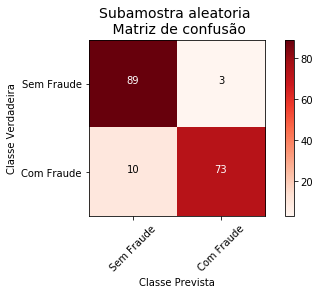

In [139]:
labels = ['Sem Fraude', 'Com Fraude']

plot_confusion_matrix(cm_subamostra, labels, title="Subamostra aleatoria \n Matriz de confusão", cmap=plt.cm.Reds)

In [140]:
n_inputs = Xsmote_treino.shape[1]

In [141]:
modelo_SMOTE = Sequential()
modelo_SMOTE.add(Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'))
modelo_SMOTE.add(Dense(2*n_inputs, activation='relu'))
modelo_SMOTE.add(Dropout(0.2))
modelo_SMOTE.add(Dense(2*n_inputs, activation='relu'))
modelo_SMOTE.add(Dense(n_inputs, activation='relu'))
modelo_SMOTE.add(Dense(2, activation='softmax'))

In [142]:
modelo_SMOTE.compile(Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [143]:
modelo_SMOTE.fit(Xsmote_treino, Ysmote_treino, validation_split=0.2, batch_size=50, epochs=50, shuffle=True, verbose=2)

Train on 630 samples, validate on 158 samples
Epoch 1/50
 - 0s - loss: 0.7183 - accuracy: 0.4492 - val_loss: 0.5393 - val_accuracy: 0.7532
Epoch 2/50
 - 0s - loss: 0.6663 - accuracy: 0.4937 - val_loss: 0.4921 - val_accuracy: 0.7532
Epoch 3/50
 - 0s - loss: 0.6356 - accuracy: 0.5111 - val_loss: 0.4624 - val_accuracy: 0.7722
Epoch 4/50
 - 0s - loss: 0.6090 - accuracy: 0.5635 - val_loss: 0.4423 - val_accuracy: 0.7848
Epoch 5/50
 - 0s - loss: 0.5796 - accuracy: 0.6127 - val_loss: 0.4270 - val_accuracy: 0.7975
Epoch 6/50
 - 0s - loss: 0.5536 - accuracy: 0.6540 - val_loss: 0.4138 - val_accuracy: 0.8165
Epoch 7/50
 - 0s - loss: 0.5411 - accuracy: 0.6952 - val_loss: 0.4013 - val_accuracy: 0.8101
Epoch 8/50
 - 0s - loss: 0.5150 - accuracy: 0.7397 - val_loss: 0.3884 - val_accuracy: 0.8165
Epoch 9/50
 - 0s - loss: 0.4993 - accuracy: 0.7714 - val_loss: 0.3766 - val_accuracy: 0.8291
Epoch 10/50
 - 0s - loss: 0.4797 - accuracy: 0.8111 - val_loss: 0.3661 - val_accuracy: 0.8291
Epoch 11/50
 - 0s - los

In [144]:
previsao_superamostra = modelo_SMOTE.predict(X_teste, batch_size=50, verbose=0)

In [145]:
previsao_fraude_superamostra = modelo_SMOTE.predict_classes(X_teste, batch_size=50, verbose=0)

Matriz de confusão
[[90  2]
 [12 71]]


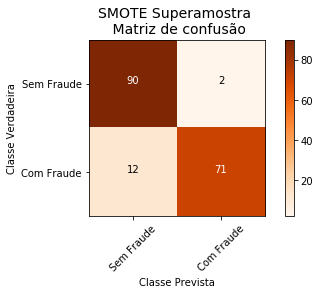

In [146]:
cm_smote_superamostra = confusion_matrix(Y_teste, previsao_fraude_superamostra)
labels = ['Sem Fraude', 'Com Fraude']
plot_confusion_matrix(cm_smote_superamostra, labels, title="SMOTE Superamostra \n Matriz de confusão", cmap=plt.cm.Oranges)

In [152]:
modelo.evaluate(X_treino,Y_treino)

699/699 [==============================] - 0s 32us/step


[0.10256046908261396, 0.9756795167922974]

Comparando as duas redes neurais observamos que a com SMOTE apresentou melhor acurácia

Se comparamos SMOTE com a rede neural, observamos que ambas tiveram um ótimo desempenho, porém, a rede neural classificou melhor as duas classes